In [2]:
#Importing necessary modules
import numpy as np
import pandas as pd

In [3]:
#Reading the data file
data = pd.read_csv("unclean_new.csv")
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,ZZZX015LV2,65,114515.0,95500,820.0,45.0,4,8.87,48,0.13,High School,Part-time,Single,No,No,Business,No,No
1,ZZZV1HB132,69,143661.0,157929,407.0,38.0,4,6.07,60,0.33,Master's,Part-time,Divorced,Yes,Yes,Home,No,No
2,ZZZMFPZFKE,27,102495.0,140375,764.0,82.0,4,23.82,24,0.63,High School,Full-time,Divorced,Yes,No,Other,No,No
3,ZZZI5YOV9G,32,101616.0,101862,628.0,32.0,2,17.45,12,0.38,High School,Full-time,Single,Yes,No,Education,No,Yes
4,ZZZHT6VWO4,37,25394.0,235125,527.0,12.0,2,12.45,24,0.17,Bachelor's,Unemployed,Married,Yes,Yes,Education,Yes,Yes


In [4]:
#Printing number of rows and columns
data.shape

(256458, 18)

In [5]:
#getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256458 entries, 0 to 256457
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          256458 non-null  object 
 1   Age             256458 non-null  int64  
 2   Income          255586 non-null  float64
 3   LoanAmount      255557 non-null  object 
 4   CreditScore     255586 non-null  float64
 5   MonthsEmployed  255586 non-null  float64
 6   NumCreditLines  256458 non-null  int64  
 7   InterestRate    255548 non-null  float64
 8   LoanTerm        256458 non-null  int64  
 9   DTIRatio        256458 non-null  float64
 10  Education       256458 non-null  object 
 11  EmploymentType  256458 non-null  object 
 12  MaritalStatus   256458 non-null  object 
 13  HasMortgage     256458 non-null  object 
 14  HasDependents   256458 non-null  object 
 15  LoanPurpose     256458 non-null  object 
 16  HasCoSigner     256458 non-null  object 
 17  Default   

In [6]:
#Data Cleaning - 1. DROP DUPLICATE ROWS

In [7]:
#checking if there are any duplicate rows in the data
data.duplicated().sum()

1021

In [8]:
data.shape

(256458, 18)

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(255437, 18)

In [11]:
#DATA CLEANING - 2. DROP UNNECESSARY COLUMNS

In [12]:
data = data.drop(columns=['LoanID'])
data.shape

(255437, 17)

In [13]:
#DATA CLEANING - 3. AGE MODIFICATION AND REMOVAL

In [14]:
#Analyzing age column for finding min and max
min_Age = data["Age"].min()
max_Age = data["Age"].max()
print(min_Age)
print(max_Age)

5
109


In [15]:
#Printing unique values in age
data["Age"].unique()

array([ 65,  69,  27,  32,  37,  30,  60,  31,  54,  28,  59,  36,  22,
        45,  29,  35,  46,  53,  25,  57,  97,  66,  26,  42,  58,  41,
        18,  67,  63,  39,  40,  24,  51,  49,  48,  44,  68,  50,  19,
        34,  56,  10,  43,  61,  64,  55,  20,  21,  96,  52,   7,  47,
        38,  33,  62,   5,  23,   6,  98, 107,  12,   8,   9, 104,  13,
       108, 100,  14, 102,  11, 105, 103,  99,  95, 109, 106, 101])

In [16]:
#counting ages below 18 and above 90
count = 0
for i in data["Age"]:
    if i<18 or i>90:
        count+=1
print(count)

2589


In [17]:
#removing the ages below 18 and above 90
condition1 = (data["Age"] <18)
condition2 = (data["Age"] >90)
data = data[~condition1]
data = data[~condition2]
print(data["Age"].min(),data["Age"].max())
data.shape

18 69


<ipython-input-17-f8f8f0f721fc>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~condition2]


(252848, 17)

In [18]:
#DATA CLEANING - 4. Replacing Values in Marital Status

In [19]:
data["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married', 'S', 'M', 'D'], dtype=object)

In [20]:
#Replacing values in marital status
default_mapping = {'M': 'Married', 'S': 'Single', 'D': 'Divorced'}
data['MaritalStatus'] = data['MaritalStatus'].replace(default_mapping)
data['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [21]:
#DATA CLEANING - 5. Changing Default Values

In [22]:
data['Default'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
#Changing values of default to 0 and 1
mapping = {'No':0,'Yes':1}
data['Default'] = data['Default'].replace(mapping)
data['Default'].unique()

array([0, 1])

In [24]:
#DATA CLEANING - 6. Checking Null Values in data and dropping them

In [25]:
data.isna().sum()

Age                 0
Income            867
LoanAmount        893
CreditScore       860
MonthsEmployed    858
NumCreditLines      0
InterestRate      903
LoanTerm            0
DTIRatio            0
Education           0
EmploymentType      0
MaritalStatus       0
HasMortgage         0
HasDependents       0
LoanPurpose         0
HasCoSigner         0
Default             0
dtype: int64

In [26]:
columns_with_null = ['Income', 'LoanAmount','CreditScore','MonthsEmployed']  # List of columns with null values
data = data.dropna(subset = columns_with_null)

In [27]:
data.isna().sum()

Age                 0
Income              0
LoanAmount          0
CreditScore         0
MonthsEmployed      0
NumCreditLines      0
InterestRate      885
LoanTerm            0
DTIRatio            0
Education           0
EmploymentType      0
MaritalStatus       0
HasMortgage         0
HasDependents       0
LoanPurpose         0
HasCoSigner         0
Default             0
dtype: int64

In [28]:
#DATA CLEANING - 7. Checking null values and filling it with mean

In [29]:
filling_columns = ['InterestRate']
for i in filling_columns:
    data[i].fillna(int(data[i].mean()),inplace=True)

In [30]:
data.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [31]:
#Data Cleaning - 8. Checking LoanAmount

In [32]:
data['LoanAmount'].unique()

array(['95500', '157929', '140375', ..., '74529', '$190856', '41421'],
      dtype=object)

In [33]:
#There are some values with $ at front we will drop those columns
mask = data['LoanAmount'].str.startswith('$')
data = data[~mask]

In [34]:
data['LoanAmount'].unique()

array(['95500', '157929', '140375', ..., '127057', '74529', '41421'],
      dtype=object)

In [35]:
#Data Cleaning - 9. Changing data types

In [36]:
column_datatypes = data.dtypes
print(column_datatypes)

Age                 int64
Income            float64
LoanAmount         object
CreditScore       float64
MonthsEmployed    float64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [37]:
#changing loanAmount datatype from object to float
data['LoanAmount'] = data['LoanAmount'].astype(float)
print(data.dtypes)

Age                 int64
Income            float64
LoanAmount        float64
CreditScore       float64
MonthsEmployed    float64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [38]:
#Data Cleaning - 10. Changing LoanTerm from months to years
print(data['LoanTerm'].min(),data['LoanTerm'].max())

12 60


In [39]:
data['LoanTerm'] = data['LoanTerm'].div(12)

In [40]:
print(data['LoanTerm'].min(),data['LoanTerm'].max())

1.0 5.0


In [41]:
####EXploratory Data Analysis

In [42]:
#1. Calculating descriptive statistics such as mean, median for the data
mean_age = data['Age'].mean()
median_income = data['Income'].median()
std_creditscore = data['CreditScore'].std()
print(mean_age,median_income,std_creditscore)

43.49864677909223 82449.0 158.81531427262692


In [43]:
#2. Bar graph for loans default based on marital status
import matplotlib.pyplot as plt
import seaborn as sns

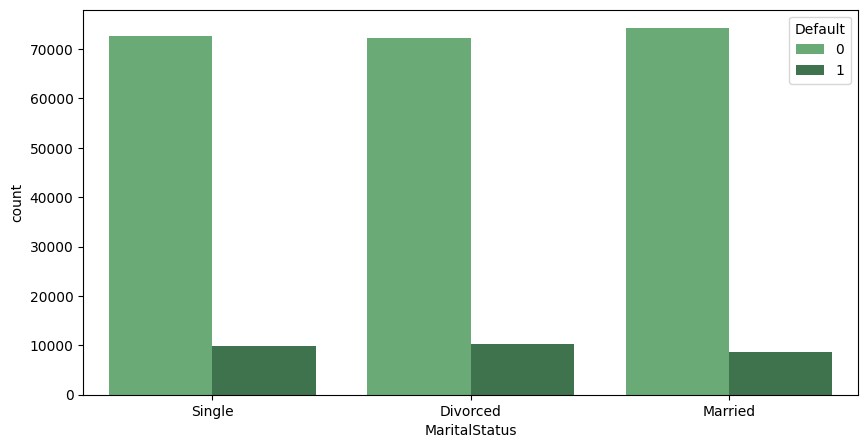

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='MaritalStatus',data=data,hue='Default',palette='Greens_d')
plt.show()

In [45]:
#3. Correlation Heat Map for data

<ipython-input-46-ed825455dce6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


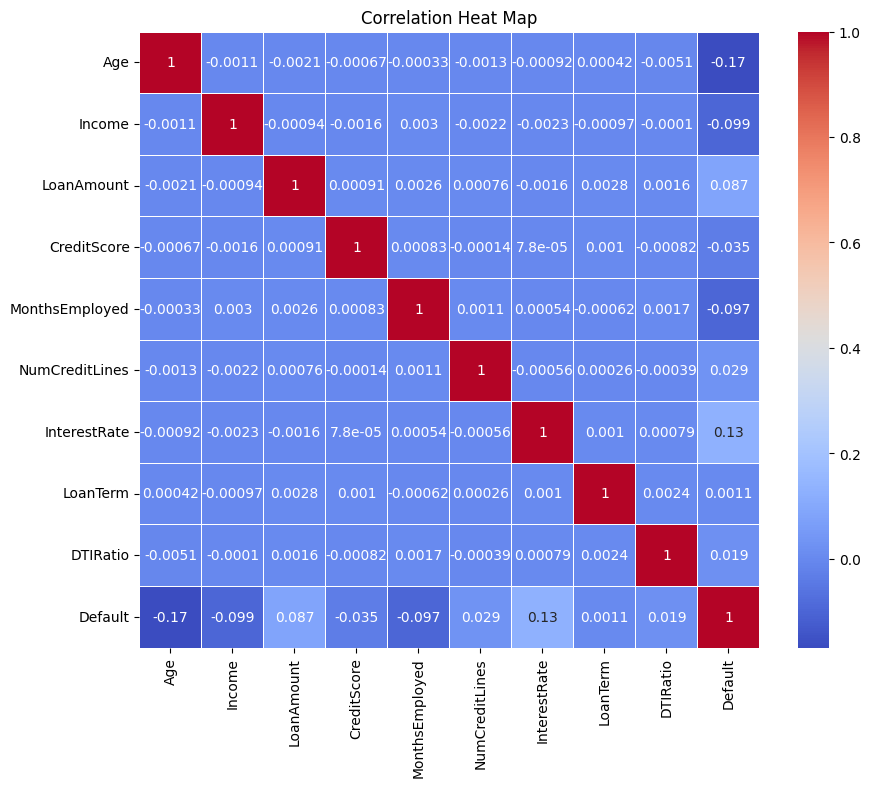

In [46]:
correlation_matrix = data.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

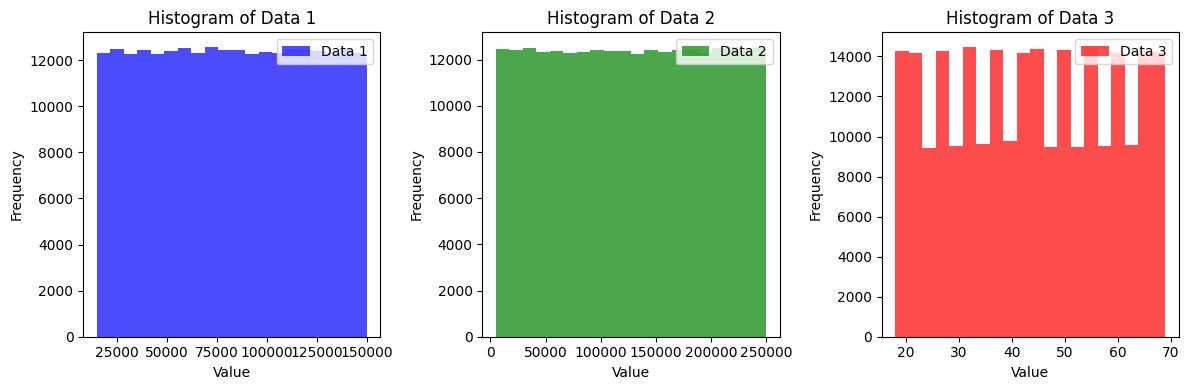

In [47]:
#4. histogram plot for distribution of numerical variables
import matplotlib.pyplot as plt
import numpy as np

# Sample data for multiple histograms
data1 = data['Income']
data2 = data['LoanAmount']
data3 = data['Age']

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Create histograms for each dataset
axs[0].hist(data1, bins=20, color='blue', alpha=0.7, label='Data 1')
axs[1].hist(data2, bins=20, color='green', alpha=0.7, label='Data 2')
axs[2].hist(data3, bins=20, color='red', alpha=0.7, label='Data 3')

# Add labels, titles, and legends
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Data 1')
axs[0].legend()

axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Data 2')
axs[1].legend()

axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Data 3')
axs[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined image
plt.show()

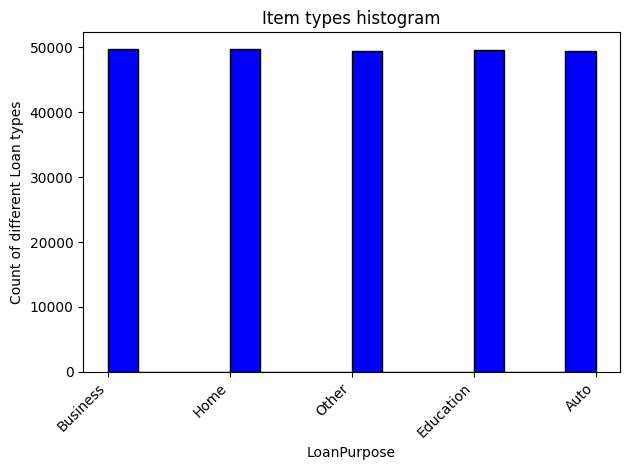

In [48]:
plt.hist(data['LoanPurpose'], bins=16, color='blue', edgecolor='black')
plt.xlabel('LoanPurpose')
plt.ylabel('Count of different Loan types')
plt.title('Item types histogram')
#plt.figure(figsize=(100, 200)
plt.xticks(rotation=45, ha='right')
#plt.legend()
plt.tight_layout()
#Show the plot
plt.show()

In [49]:
import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

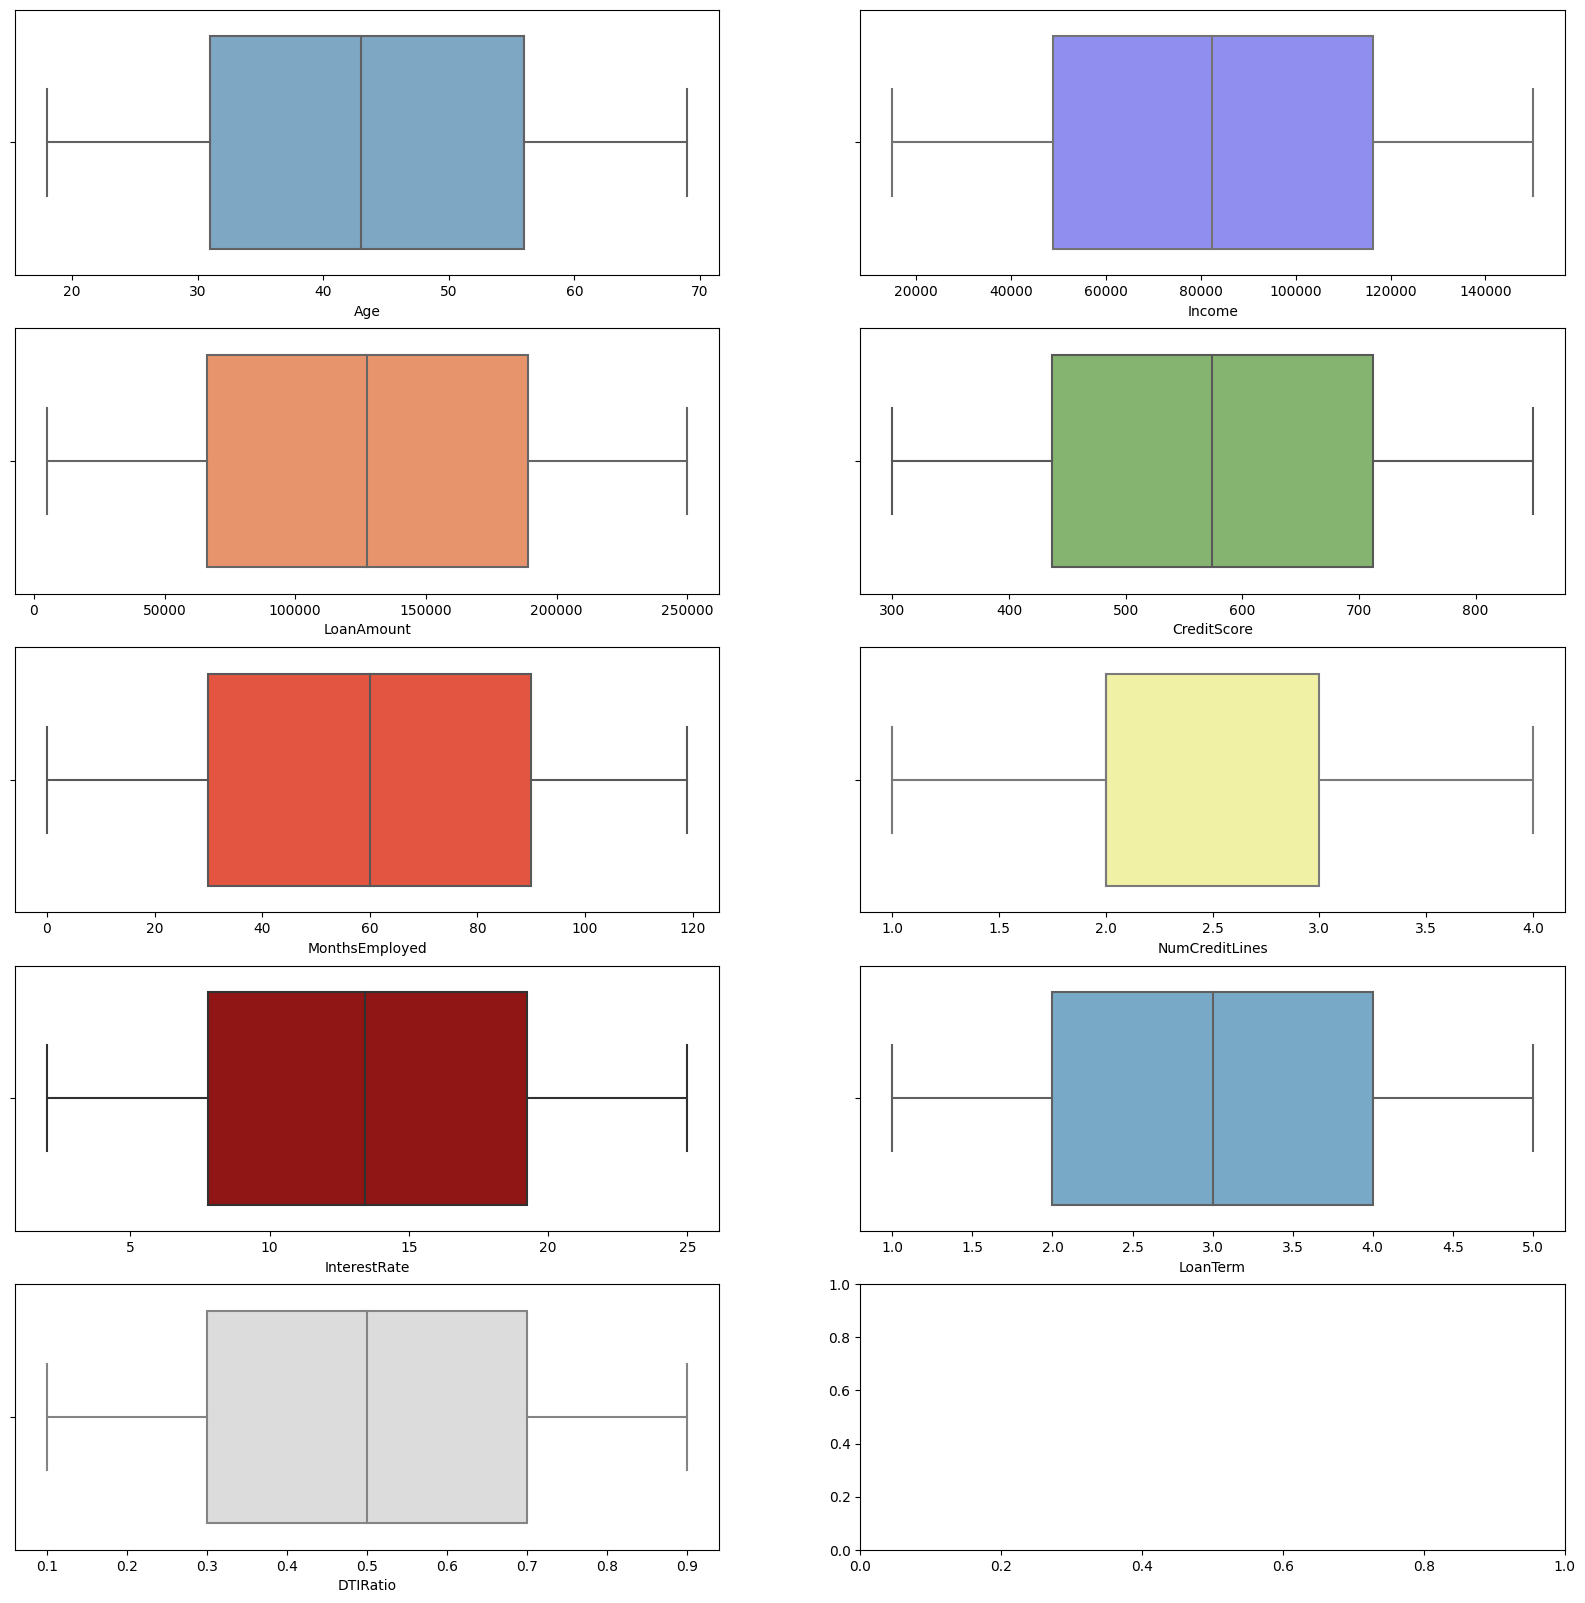

In [50]:
#5. Box plot - generating the box plot to identify outliers in numerical data
fig, axs = plt.subplots(5, 2, figsize=(20,20))
axs = axs.flatten()

for i in range(len(data.columns) - 1):
    if data[data.columns[i]].dtype == 'float64' or data[data.columns[i]].dtype == 'int64':
        sns.boxplot(data=data, x=data.columns[i], ax=axs[i], palette = random.choice(pallete))

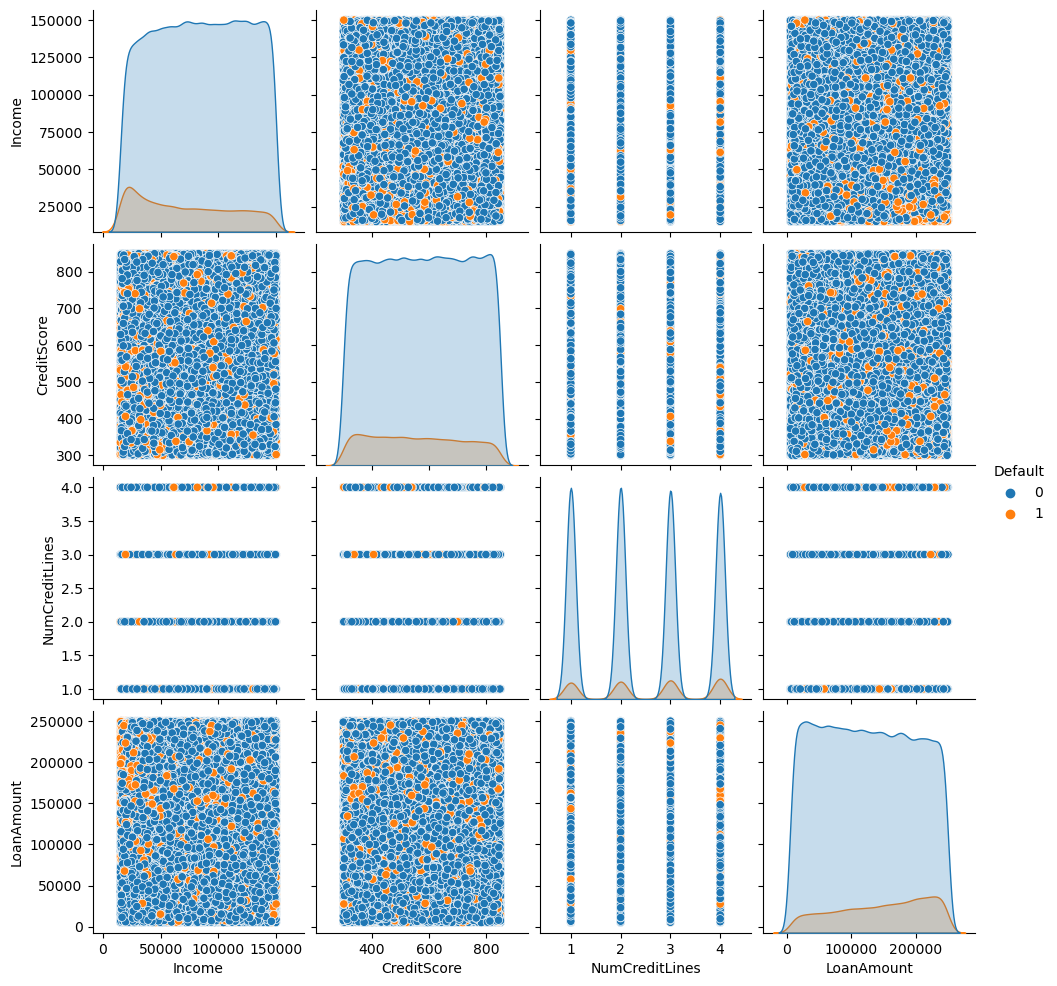

In [ ]:
#6. Pair plots - Create pair plots to visualize relationships between multiple numerical variables.
sns.pairplot(data[['Income', 'CreditScore', 'NumCreditLines', 'LoanAmount','Default']],hue='Default')

<Axes: xlabel='Education', ylabel='InterestRate'>

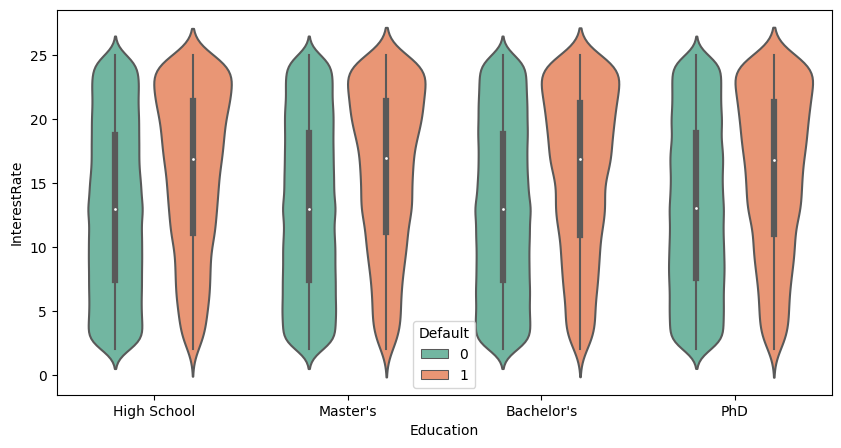

In [51]:
#7.
plt.figure(figsize = (10,5))
sns.violinplot(x='Education', y='InterestRate',hue='Default', data=data, palette="Set2")

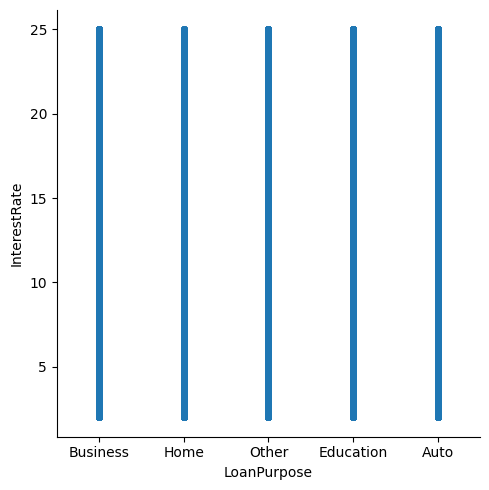

In [52]:
#8.categorical plot for loan purpose and interest rate
sns.catplot(x="LoanPurpose", y="InterestRate", data=data,jitter=False)

In [53]:
#9. Feature Engineering
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['Income']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247927 entries, 0 to 256420
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                247927 non-null  int64  
 1   Income             247927 non-null  float64
 2   LoanAmount         247927 non-null  float64
 3   CreditScore        247927 non-null  float64
 4   MonthsEmployed     247927 non-null  float64
 5   NumCreditLines     247927 non-null  int64  
 6   InterestRate       247927 non-null  float64
 7   LoanTerm           247927 non-null  float64
 8   DTIRatio           247927 non-null  float64
 9   Education          247927 non-null  object 
 10  EmploymentType     247927 non-null  object 
 11  MaritalStatus      247927 non-null  object 
 12  HasMortgage        247927 non-null  object 
 13  HasDependents      247927 non-null  object 
 14  LoanPurpose        247927 non-null  object 
 15  HasCoSigner        247927 non-null  object 
 16  De

<ipython-input-54-bcc3017ef769>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LoanToIncomeRatio'])


<Axes: xlabel='LoanToIncomeRatio', ylabel='Density'>

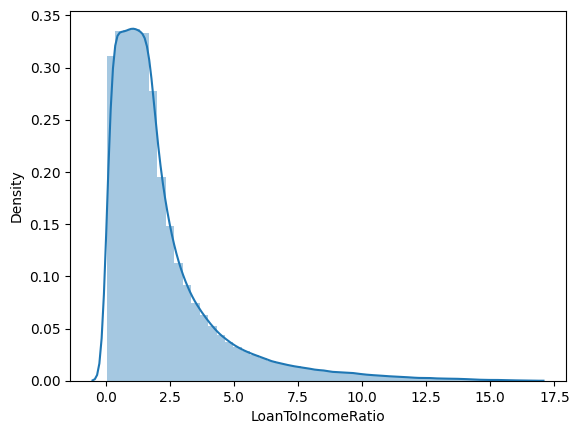

In [54]:
#10.Dist plot
sns.distplot(data['LoanToIncomeRatio'])

<Axes: xlabel='Education', ylabel='LoanToIncomeRatio'>

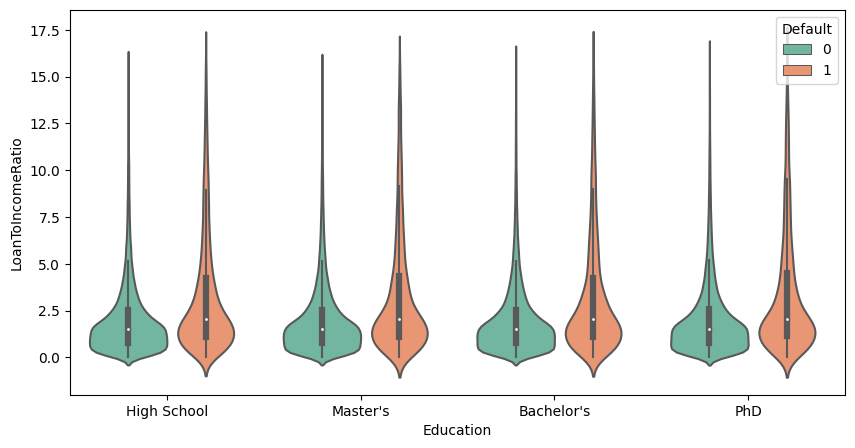

In [55]:
#11. Violinplot
plt.figure(figsize = (10,5))
sns.violinplot(x='Education', y='LoanToIncomeRatio',hue='Default', data=data, palette="Set2")

In [56]:
#PHASE - 2

In [57]:
#Since there are some features with categorical values at first we will be changing those
#values to numeric so that we can use all the features for the classification
#Changing all string input data to numerical for using the features for classification
mapping = {'No':0,'Yes':1}
data['HasMortgage'] = data['HasMortgage'].replace(mapping)
data['HasDependents'] = data['HasDependents'].replace(mapping)
data['HasCoSigner'] = data['HasCoSigner'].replace(mapping)

In [58]:
#changing the following features: Education, EmploymentType, MaritalStatus, LoanPurpose
mappingEducation = {'High School':0,'Bachelor\'s':1,'Master\'s':2,'PhD':3}
data['Education'] = data['Education'].replace(mappingEducation)
print(data['Education'].unique())

mappingEmployment = {'Part-time':0,'Full-time':1,'Unemployed':2,'Self-employed':3}
data['EmploymentType'] = data['EmploymentType'].replace(mappingEmployment)
print(data['EmploymentType'].unique())

mappingMaritalStatus = {'Single':0,'Married':1,'Divorced':2}
data['MaritalStatus'] = data['MaritalStatus'].replace(mappingMaritalStatus)
print(data['MaritalStatus'].unique())

mappingLoanPurpose = {'Business':0,'Home':1,'Education':2,'Auto':3,'Other':4}
data['LoanPurpose'] = data['LoanPurpose'].replace(mappingLoanPurpose)
print(data['LoanPurpose'].unique())


[0 2 1 3]
[0 1 2 3]
[0 2 1]
[0 1 4 2 3]


In [59]:
data = data.copy()
X = data.drop(['Default'], axis=1)
y = data['Default']

In [60]:
#selecting features by checking the significance of all the features for predicting the Y value.
from sklearn.ensemble import RandomForestRegressor

encoded_features = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)
# Initialize and fit RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest_regressor.fit(encoded_features, y)

# Extract feature importances
feature_importances = random_forest_regressor.feature_importances_

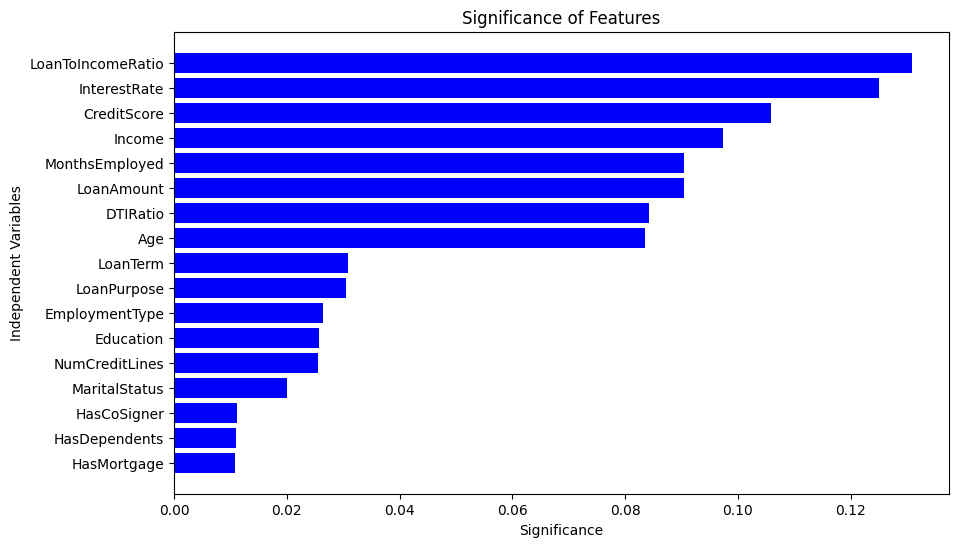

In [61]:
# Creating a DataFrame to store th efeature importances
feature_importance_df = pd.DataFrame({'Feature': encoded_features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Significance')
plt.ylabel('Independent Variables')
plt.title('Significance of Features')
plt.gca().invert_yaxis()
plt.show()

In [62]:
# Selecting relevant features for the predictive models based on significance of the features from
#the above
X = data[['LoanToIncomeRatio','InterestRate', 'CreditScore', 'Income',
          'MonthsEmployed','LoanAmount', 'DTIRatio', 'Age']]
y = data['Default']


In [266]:
#keeping track of all the models accuracy and corrseponding metrics for further comparison and analysis
#between different models
model_results = {
    'Classifier' : [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

In [64]:
#Random Forest

In [68]:
#Importing necessary modules for all the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [66]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the random forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [69]:
y_pred = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)
print(classification_report(y_test,y_pred))

0.8815189771306418
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     43900
           1       0.40      0.06      0.11      5686

    accuracy                           0.88     49586
   macro avg       0.64      0.53      0.52     49586
weighted avg       0.83      0.88      0.84     49586



In [70]:
#As we can see above that the model accuracy is good but when we consider the recall and f1-scores
#for class-1 are less than 15%. The model is not good enough for class 1 in prediction

In [71]:
#checking the target count values for each class
print(0," ",sum(y==0))
print(1," ",sum(y==1))

0   219158
1   28769


In [72]:
#As we can see above that there is a huge differnce between class-0 and class-1 which is leading the model
#oversampling towards class-0 and undersampling towards class-1 and the model is showing higher bias while
#prediction towards class-0

#To balance this we will be considering oversampling, because if we use undersampling there is a chance of
#loosing so much of class-0 data

In [73]:
#As of now we will be trying to increase the class-1 values and balance it with class-0
#for this we will be using SMOTE, which balances both classes in the classification

resampled_data = SMOTE(random_state=42)
X_resample,y_resample = resampled_data.fit_resample(X, y)

In [74]:
#Now we will check whether both the classes are balanced or not
print("Before resampling the data :: ")
print(0," ",sum(y==0))
print(1," ",sum(y==1))
print("After resampling the data :: ")
print(0," ",sum(y_resample==0))
print(1," ",sum(y_resample==1))

Before resampling the data :: 
0   219158
1   28769
After resampling the data :: 
0   219158
1   219158


In [264]:
#As the classes are balanced we will test our model again
#Random Forest - After resampling the data
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [265]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_rf)
precision_rf = precision_score(y_test,y_pred)
print("Precision :: ",precision_rf)
recall_rf = recall_score(y_test,y_pred)
print("Recall :: ",recall_rf)
f1_score_rf = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_rf)
print(classification_report(y_test,y_pred))

Accuracy ::  0.8316298594634057
Precision ::  0.8109122709724207
Recall ::  0.8657572928290028
F1 Score ::  0.8374377725891009
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     43751
           1       0.81      0.87      0.84     43913

    accuracy                           0.83     87664
   macro avg       0.83      0.83      0.83     87664
weighted avg       0.83      0.83      0.83     87664



In [77]:
#Even though the accuracy is decreased a little bit when compared before resampling of the data
#the precision, recall and f1-scores for each class are good
#so from furthur we will be using resampled data for testing the models

In [267]:
#Adding the metrics to the model_results for future comaprison between models
model_results['Classifier'].append("Random Forest")
model_results['Accuracy'].append(accuracy_rf)
model_results['F1 Score'].append(f1_score_rf)
model_results['Precision'].append(precision_rf)
model_results['Recall'].append(recall_rf)
print(model_results)

{'Classifier': ['Random Forest'], 'Accuracy': [0.8316298594634057], 'F1 Score': [0.8374377725891009], 'Precision': [0.8109122709724207], 'Recall': [0.8657572928290028]}


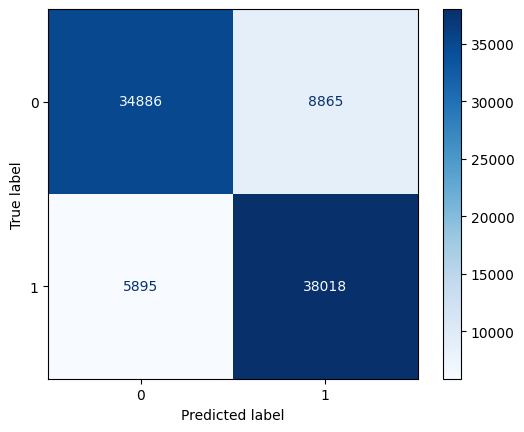

In [268]:
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.show()

In [80]:
#Logistic Regression

In [242]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
model = LogisticRegression()
#Scalling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [243]:
y_pred = model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_lr)
precision_lr = precision_score(y_test,y_pred)
print("Precision :: ",precision_lr)
recall_lr = recall_score(y_test,y_pred)
print("Recall :: ",recall_lr)
f1_score_lr = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_lr)
print(classification_report(y_test,y_pred))

Accuracy ::  0.6900438036137981
Precision ::  0.6878520613119684
Recall ::  0.6979709880900872
F1 Score ::  0.6928745817885885
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     43751
           1       0.69      0.70      0.69     43913

    accuracy                           0.69     87664
   macro avg       0.69      0.69      0.69     87664
weighted avg       0.69      0.69      0.69     87664



In [269]:
#Adding metrics
model_results['Classifier'].append("Logistic Regression")
model_results['Accuracy'].append(accuracy_lr)
model_results['F1 Score'].append(f1_score_lr)
model_results['Precision'].append(precision_lr)
model_results['Recall'].append(recall_lr)
print(model_results)

{'Classifier': ['Random Forest', 'Logistic Regression'], 'Accuracy': [0.8316298594634057, 0.6900438036137981], 'F1 Score': [0.8374377725891009, 0.6928745817885885], 'Precision': [0.8109122709724207, 0.6878520613119684], 'Recall': [0.8657572928290028, 0.6979709880900872]}


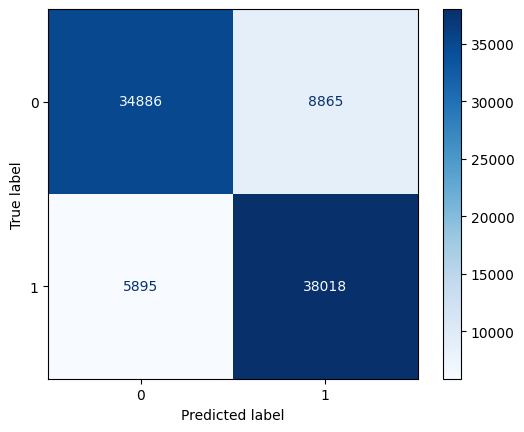

In [270]:
#confusion matrix for logistic regression
cm_log_regression = confusion_matrix(y_test, y_pred)
disp_log_regression = ConfusionMatrixDisplay(confusion_matrix=cm_log_regression)
disp_log_regression.plot(cmap='Blues', values_format='d')
plt.show()

In [85]:
#KNN

In [273]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
k = 3  # Set the number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [274]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_knn)
precision_knn = precision_score(y_test,y_pred)
print("Precision :: ",precision_knn)
recall_knn = recall_score(y_test,y_pred)
print("Recall :: ",recall_knn)
f1_score_knn = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_knn)
print(classification_report(y_test,y_pred))

Accuracy ::  0.7745026464683337
Precision ::  0.7266412600672086
Recall ::  0.8814246350738961
F1 Score ::  0.7965836591891337
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     43751
           1       0.73      0.88      0.80     43913

    accuracy                           0.77     87664
   macro avg       0.79      0.77      0.77     87664
weighted avg       0.79      0.77      0.77     87664



In [275]:
#Adding metrics
model_results['Classifier'].append("KNN")
model_results['Accuracy'].append(accuracy_knn)
model_results['F1 Score'].append(f1_score_knn)
model_results['Precision'].append(precision_knn)
model_results['Recall'].append(recall_knn)
print(model_results)

{'Classifier': ['Random Forest', 'Logistic Regression', 'KNN'], 'Accuracy': [0.8316298594634057, 0.6900438036137981, 0.7745026464683337], 'F1 Score': [0.8374377725891009, 0.6928745817885885, 0.7965836591891337], 'Precision': [0.8109122709724207, 0.6878520613119684, 0.7266412600672086], 'Recall': [0.8657572928290028, 0.6979709880900872, 0.8814246350738961]}


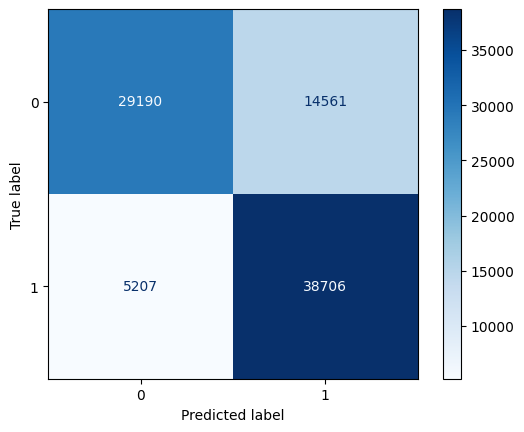

In [276]:
#confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='Blues', values_format='d')
plt.show()

In [277]:
#Decision Tree

In [278]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

decision_clf = DecisionTreeClassifier(random_state=42)
decision_clf.fit(X_train, y_train)
y_pred = decision_clf.predict(X_test)

In [279]:
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_dt)
precision_dt = precision_score(y_test,y_pred)
print("Precision :: ",precision_dt)
recall_dt = recall_score(y_test,y_pred)
print("Recall :: ",recall_dt)
f1_score_dt = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_dt)
print(classification_report(y_test,y_pred))

Accuracy ::  0.7957428362839934
Precision ::  0.7871861127675082
Recall ::  0.8116730808644365
F1 Score ::  0.7992420844918826
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     43751
           1       0.79      0.81      0.80     43913

    accuracy                           0.80     87664
   macro avg       0.80      0.80      0.80     87664
weighted avg       0.80      0.80      0.80     87664



In [280]:
#Adding metrics
model_results['Classifier'].append("Decision Tree")
model_results['Accuracy'].append(accuracy_dt)
model_results['F1 Score'].append(f1_score_dt)
model_results['Precision'].append(precision_dt)
model_results['Recall'].append(recall_dt)
print(model_results)

{'Classifier': ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree'], 'Accuracy': [0.8316298594634057, 0.6900438036137981, 0.7745026464683337, 0.7957428362839934], 'F1 Score': [0.8374377725891009, 0.6928745817885885, 0.7965836591891337, 0.7992420844918826], 'Precision': [0.8109122709724207, 0.6878520613119684, 0.7266412600672086, 0.7871861127675082], 'Recall': [0.8657572928290028, 0.6979709880900872, 0.8814246350738961, 0.8116730808644365]}


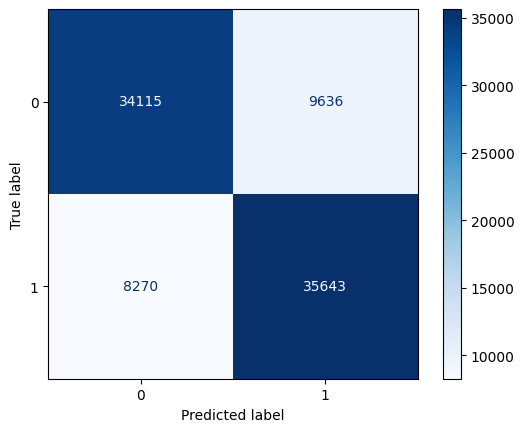

In [281]:
#Confusion matrix for Decision Tree
cm_dec_tree = confusion_matrix(y_test, y_pred)
disp_dec_tree = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree)
disp_dec_tree.plot(cmap='Blues', values_format='d')
plt.show()

In [282]:
#XG Booster

In [283]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate = 0.9,
    max_depth = 5,
    n_estimators = 150,
    alpha = 0.5
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [284]:
accuracy_xg = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_xg)
precision_xg = precision_score(y_test,y_pred)
print("Precision :: ",precision_xg)
recall_xg = recall_score(y_test,y_pred)
print("Recall :: ",recall_xg)
f1_score_xg = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_xg)
print(classification_report(y_test,y_pred))

Accuracy ::  0.8636726592443876
Precision ::  0.9068689851825449
Recall ::  0.8111493179696218
F1 Score ::  0.8563426332175356
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     43751
           1       0.91      0.81      0.86     43913

    accuracy                           0.86     87664
   macro avg       0.87      0.86      0.86     87664
weighted avg       0.87      0.86      0.86     87664



In [285]:
#Adding metrics
model_results['Classifier'].append("XGBoost")
model_results['Accuracy'].append(accuracy_xg)
model_results['F1 Score'].append(f1_score_xg)
model_results['Precision'].append(precision_xg)
model_results['Recall'].append(recall_xg)
print(model_results)

{'Classifier': ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'XGBoost'], 'Accuracy': [0.8316298594634057, 0.6900438036137981, 0.7745026464683337, 0.7957428362839934, 0.8636726592443876], 'F1 Score': [0.8374377725891009, 0.6928745817885885, 0.7965836591891337, 0.7992420844918826, 0.8563426332175356], 'Precision': [0.8109122709724207, 0.6878520613119684, 0.7266412600672086, 0.7871861127675082, 0.9068689851825449], 'Recall': [0.8657572928290028, 0.6979709880900872, 0.8814246350738961, 0.8116730808644365, 0.8111493179696218]}


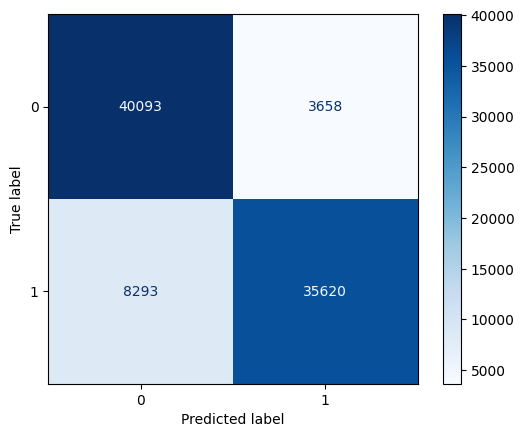

In [286]:
#confusion matrix for xg boost
cm_xg_boost = confusion_matrix(y_test, y_pred)
disp_xg_boost = ConfusionMatrixDisplay(confusion_matrix=cm_xg_boost)
disp_xg_boost.plot(cmap='Blues', values_format='d')
plt.show()

In [287]:
#Neural Network
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

In [288]:
accuracy_nn = accuracy_score(y_test, y_pred)
print("Accuracy :: ",accuracy_nn)
precision_nn = precision_score(y_test,y_pred)
print("Precision :: ",precision_nn)
recall_nn = recall_score(y_test,y_pred)
print("Recall :: ",recall_nn)
f1_score_nn = f1_score(y_test,y_pred)
print("F1 Score :: ",f1_score_nn)
print(classification_report(y_test,y_pred))

Accuracy ::  0.6762981383464136
Precision ::  0.6321088435374149
Recall ::  0.8464008380206317
F1 Score ::  0.7237253317496324
              precision    recall  f1-score   support

           0       0.77      0.51      0.61     43751
           1       0.63      0.85      0.72     43913

    accuracy                           0.68     87664
   macro avg       0.70      0.68      0.67     87664
weighted avg       0.70      0.68      0.67     87664



In [289]:
#Adding metrics
model_results['Classifier'].append("Neural Network")
model_results['Accuracy'].append(accuracy_nn)
model_results['F1 Score'].append(f1_score_nn)
model_results['Precision'].append(precision_nn)
model_results['Recall'].append(recall_nn)
print(model_results)

{'Classifier': ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'XGBoost', 'Neural Network'], 'Accuracy': [0.8316298594634057, 0.6900438036137981, 0.7745026464683337, 0.7957428362839934, 0.8636726592443876, 0.6762981383464136], 'F1 Score': [0.8374377725891009, 0.6928745817885885, 0.7965836591891337, 0.7992420844918826, 0.8563426332175356, 0.7237253317496324], 'Precision': [0.8109122709724207, 0.6878520613119684, 0.7266412600672086, 0.7871861127675082, 0.9068689851825449, 0.6321088435374149], 'Recall': [0.8657572928290028, 0.6979709880900872, 0.8814246350738961, 0.8116730808644365, 0.8111493179696218, 0.8464008380206317]}


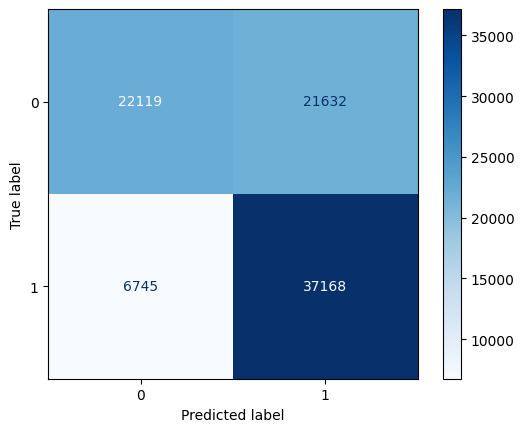

In [290]:
#confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot(cmap='Blues', values_format='d')
plt.show()

In [291]:
#Analyzing all the models
#print(model_results)
classifiers_res = model_results['Classifier']
accuracy_res = model_results['Accuracy']
precision_res = model_results['Precision']
f1_score_res = model_results['F1 Score']
recall_res = model_results['Recall']
df_res = pd.DataFrame({'Classifier': classifiers_res,
                       'Accuracy': accuracy_res,
                       'Precision': precision_res,
                       'F1 Score': f1_score_res,
                       'Recall': recall_res})
print(df_res)

            Classifier  Accuracy  Precision  F1 Score    Recall
0        Random Forest  0.831630   0.810912  0.837438  0.865757
1  Logistic Regression  0.690044   0.687852  0.692875  0.697971
2                  KNN  0.774503   0.726641  0.796584  0.881425
3        Decision Tree  0.795743   0.787186  0.799242  0.811673
4              XGBoost  0.863673   0.906869  0.856343  0.811149
5       Neural Network  0.676298   0.632109  0.723725  0.846401


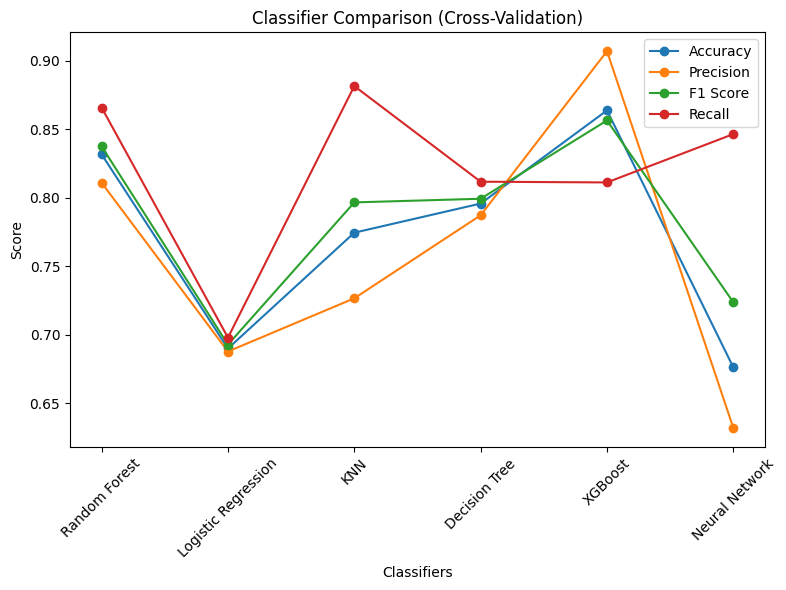

In [292]:
# Create line plots to compare evaluation metrics
plt.figure(figsize=(8, 6))
for metric_name, metric_results in {
    'Accuracy': model_results['Accuracy'],
    'Precision': model_results['Precision'],
    'F1 Score': model_results['F1 Score'],
    'Recall': model_results['Recall']
}.items():
    plt.plot(model_results['Classifier'], metric_results, label=metric_name, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Comparison (Cross-Validation)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()